In [1]:
# data
import numpy as np
import pandas as pd
from faker import Faker
# plot
import matplotlib.pyplot as plt
# model
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression

In [2]:
RANDOM_STATE = 42
N_SAMPLES = 7000
N_FEATURES = 2000
fake = Faker("pt_BR")
fake.seed_instance(RANDOM_STATE)
scaler = MinMaxScaler((0, 99))

In [3]:
def generate_facebook_groups(n_features):
    facebook_groups = fake.sentence(nb_words=n_features*2).split()[:n_features]
    return facebook_groups

def generate_names(n_samples):
    names_list = [fake.name() for _ in range(n_samples)]
    names = np.array(names_list).reshape(-1, 1)
    return names

def generate_emails(n_samples):
    emails_list = [fake.email() for _ in range(n_samples)]
    emails = np.array(emails_list).reshape(-1, 1)
    return emails

In [4]:
def make_data(n_samples, n_features):
    # generate fake data
    facebook_groups = generate_facebook_groups(n_features)
    names = generate_names(n_samples)
    emails = generate_emails(n_samples)
    # generate data
    X, y = make_regression(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=int(n_features/100),
        n_targets=5,
        random_state=RANDOM_STATE)
    # makes sure features are either 0 or 1
    X[X >= 1] = 1
    X[X < 1] = 0
    # scaling continous y
    y = scaler\
        .fit_transform(y)\
        .round()\
        .astype(int)\
        .copy()
    # cast as pd.DataFrame
    X = pd.DataFrame(data=X, columns=facebook_groups, dtype=int)
    ids = pd.DataFrame(np.concatenate([names, emails], axis=1), columns=["name", "email"])
    X = pd.concat([ids, X], axis=1)
    y = pd.DataFrame(data=y, columns=["O", "C", "E", "A", "N"])
    # train test split
    X_train, X_test, y_train, _ = train_test_split(X, y, test_size=0.85, random_state=RANDOM_STATE)
    return X_train, X_test, y_train

In [5]:
X_train, X_test, y_train = make_data(N_SAMPLES, N_FEATURES)

In [6]:
X_train

,name,email,Ad,eius,dolore,qui,perspiciatis,tempora,assumenda,in,...,magnam,enim,repellendus,quasi,eum,nisi,perferendis,eum,error,corporis
3421,Laís Azevedo,calebe40@rezende.com,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2563,Samuel Nascimento,theo87@bol.com.br,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5622,Sra. Rebeca Moreira,rafaela84@vieira.com,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1605,Marcos Vinicius Porto,da-luzkaique@azevedo.com,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6746,Sr. Enrico da Paz,valentinavieira@moreira.com,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2324,Ian Lima,pintomaria-cecilia@ramos.br,1,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
2709,Diogo da Mata,agathasilva@vieira.br,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6141,Helena da Cruz,yasmin81@cavalcanti.br,0,0,1,0,0,0,0,0,...,1,1,1,0,0,1,0,0,0,1
1312,Bryan Caldeira,gabriela91@da.com,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3448,João Lucas Aragão,maria-sophia93@hotmail.com,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [7]:
y_train

,O,C,E,A,N
3421,61,48,58,39,49
2563,41,35,43,41,51
5622,42,30,37,21,42
1605,35,33,30,37,54
6746,54,47,54,45,57
2324,46,34,38,37,43
2709,69,64,64,69,73
6141,52,50,43,44,35
1312,48,35,46,39,41
3448,58,50,57,56,53


In [8]:
X_test

,name,email,Ad,eius,dolore,qui,perspiciatis,tempora,assumenda,in,...,magnam,enim,repellendus,quasi,eum,nisi,perferendis,eum,error,corporis
6500,Sra. Marcela Ribeiro,stella51@gmail.com,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2944,Diogo Ramos,hsales@pires.com,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2024,Raquel da Costa,dfreitas@uol.com.br,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
263,Ana Sophia da Rosa,isabelly75@lima.br,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4350,Vinicius Cardoso,lavinia38@lopes.br,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3424,Ana Julia da Rosa,salesdiogo@nascimento.com,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6748,Emanuella Castro,cardosoisaac@hotmail.com,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
6215,Sofia das Neves,bruno53@silveira.net,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6362,Sarah Moura,felipesilva@gmail.com,0,0,0,0,1,0,0,1,...,1,0,0,1,1,0,0,1,0,0
5589,Mariana Pereira,lunaduarte@cunha.com,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


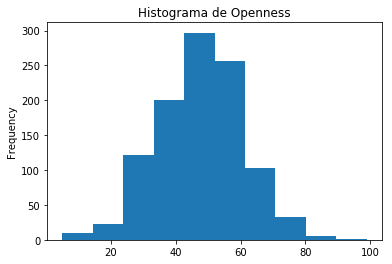

In [9]:
y_train["O"].plot(kind="hist", title="Histograma de Openness");

In [10]:
feature_names = X_train.columns.tolist()
feature_names.remove("name")
feature_names.remove("email")
feature_names[:5]

['Ad', 'eius', 'dolore', 'qui', 'perspiciatis']

In [11]:
svd = TruncatedSVD(
    n_components=100,
    algorithm="randomized",
    n_iter=5,
    random_state=42,
    tol=0.0
)
svd.fit(X_train[feature_names])
print("\nANTES",
      "\nFormato da base de treino:", X_train[feature_names].shape,
      "\nFormato da base de test:", X_test[feature_names].shape)
X_train_svd = svd.transform(X_train[feature_names])
X_test_svd = svd.transform(X_test[feature_names])
print("\n\nDEPOIS",
      "\nFormato da base de treino:", X_train_svd.shape,
      "\nFormato da base de test:", X_test_svd.shape)


ANTES 
Formato da base de treino: (1050, 23810) 
Formato da base de test: (5950, 23810)


DEPOIS 
Formato da base de treino: (1050, 100) 
Formato da base de test: (5950, 100)


In [12]:
lr = LinearRegression(
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=-1)                                             # declaração do modelo
lr.fit(X_train_svd, y_train["O"])                          # ajuste do model linear
predictions = lr.predict(X_test_svd)                       # predição
eleitorado_americano = X_test[["name", "email"]].copy()    # eleitorado americano
eleitorado_americano.loc[:, "O"] = predictions
eleitorado_americano.tail()

,name,email,O
2870,Luigi Oliveira,caua82@nascimento.br,46.873749
3735,Bruno Barros,wda-conceicao@dias.br,58.407111
6394,Gabriel Teixeira,guilherme49@ig.com.br,48.912185
2397,Pedro Henrique Moreira,sabrinacardoso@gmail.com,45.819528
3517,Sophie Alves,olivia42@rezende.org,44.115316


In [13]:
pd.DataFrame({
    "coefficients": lr.coef_,
    "components": [i for i in range(100)]
})

,coefficients,components
0,0.572455,0
1,-0.056191,1
2,-0.098749,2
3,-0.012167,3
4,-0.097948,4
5,-0.091021,5
6,-0.121267,6
7,0.043159,7
8,0.311467,8
9,0.178768,9


In [14]:
lasso = Lasso(
    alpha=0.3,
    random_state=42)                                       # declaração do modelo
lasso.fit(X_train[feature_names], y_train["O"])            # ajuste do model linear
predictions = lasso.predict(X_test[feature_names])         # predição
eleitorado_americano = X_test[["name", "email"]].copy()    # eleitorado americano
eleitorado_americano.loc[:, "O"] = predictions
eleitorado_americano.tail()

,name,email,O
2870,Luigi Oliveira,caua82@nascimento.br,41.937191
3735,Bruno Barros,wda-conceicao@dias.br,66.926748
6394,Gabriel Teixeira,guilherme49@ig.com.br,53.420208
2397,Pedro Henrique Moreira,sabrinacardoso@gmail.com,54.406727
3517,Sophie Alves,olivia42@rezende.org,47.190462


In [15]:
pd.DataFrame({
    "coefficients": lasso.coef_[:len(feature_names)],
    "feature": feature_names
})

,coefficients,feature
0,-0.000000,Ad
1,0.000000,eius
2,-0.000000,dolore
3,0.000000,qui
4,0.000000,perspiciatis
5,0.000000,tempora
6,2.078826,assumenda
7,0.000000,in
8,-0.000000,adipisci
9,-0.000000,dolor
